In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from pprint import pprint
import seaborn as sns
import os
import cv2

from tensorflow import keras
from keras import backend as K
from tensorflow.keras.preprocessing.image import load_img
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Activation, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNet, imagenet_utils
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
X = []
y = []
classes = ['watch', 'sunglasses', 'empty']
base_path = '/content/drive/MyDrive/images2/'

for i, target in enumerate(classes):
    files = os.listdir(base_path+target)
    for file in files:
         # load the image
        img = load_img(base_path+target+'/'+file)
         # convert it to an array
        img_array = img_to_array(img)
         # append the array to X
        X.append(img_array)
         # append the numeric target to y
        y.append(i)

X = np.array(X)
y = np.array(y)

# shuffle the data
shuffler = np.random.permutation(len(X))
X = X[shuffler]
y = y[shuffler]

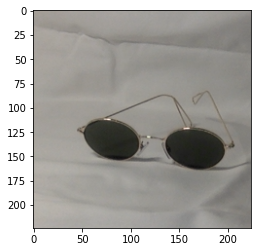

In [4]:
img = load_img("/content/drive/MyDrive/images2/sunglasses/21-55-02-198741.png")
plt.imshow(img)
plt.show()

In [5]:
X.shape, y.shape

((342, 224, 224, 3), (342,))

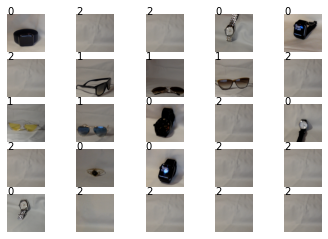

In [6]:
# Have a look at the data graphically:
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X[i].astype('uint8'), cmap='Blues')
    plt.axis('off')
    plt.text(0, 0, y[i]) # displays y-values in each subplot

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size = 0.25, random_state = 42) 

X_train.shape, y_train.shape

((256, 224, 224, 3), (256,))

In [8]:
y

array([0, 2, 2, 0, 0, 2, 1, 1, 1, 2, 1, 1, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2,
       2, 2, 2, 1, 0, 1, 1, 2, 1, 0, 2, 1, 2, 0, 0, 0, 2, 1, 1, 1, 0, 2,
       1, 0, 0, 2, 2, 1, 0, 0, 2, 1, 2, 1, 0, 2, 2, 1, 1, 0, 1, 0, 0, 0,
       0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 2, 0, 1, 2, 1, 0, 0, 1, 0, 2, 0, 2,
       0, 2, 0, 1, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 2, 1, 2, 1, 1, 1, 1, 1, 0, 2, 2, 1, 0, 0, 2, 2, 0, 1, 0, 0, 0,
       1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 1, 2, 1, 2, 2, 1, 0, 1, 2, 1, 2,
       2, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 0, 2, 0, 0, 1, 2, 1, 2, 0, 2,
       0, 0, 2, 0, 2, 1, 1, 1, 2, 1, 2, 1, 0, 0, 2, 2, 0, 2, 2, 0, 0, 1,
       0, 0, 2, 2, 0, 2, 2, 1, 2, 1, 1, 1, 0, 2, 0, 1, 2, 0, 0, 1, 0, 0,
       2, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 1, 2, 1, 0, 2, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0, 1, 1,
       0, 1, 2, 1, 2, 0, 0, 1, 0, 2, 2, 2, 1, 2, 0, 2, 1, 2, 2, 0, 2, 2,
       2, 2, 1, 0, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2,

In [9]:
ytest_true = y_test.copy()

In [10]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [11]:
# Clear session and build model:
K.clear_session()

model1 = Sequential([
    Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), padding = "valid", activation = "relu" ,
           input_shape = (224, 224, 3)), 
    
    MaxPooling2D(pool_size = (2,2),strides=(2,2),padding = "valid"),

    Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), padding = "valid", activation = "relu"),
    
    MaxPooling2D(pool_size = (2,2),strides=(2,2),padding = "valid"),
    
    Flatten(),
    
    #Fully connected layers:
    
    Dense(512,activation='relu'),
    Dropout(0.2),# - optional
    
    #Output layer:
    Dense(3 ,activation= "softmax")

    
])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 512)               9

In [12]:
# compile the model
model1.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
X_train.shape, y_train.shape

((256, 224, 224, 3), (256, 3))

In [14]:
history = model1.fit(X_train, y_train, epochs=10, validation_split = 0.25)

Epoch 1/10
6/6 [==============================] - 26s 4s/step - loss: 5261.8984 - accuracy: 0.3906 - val_loss: 1280.4620 - val_accuracy: 0.2969
Epoch 2/10
6/6 [==============================] - 22s 4s/step - loss: 655.5110 - accuracy: 0.4844 - val_loss: 10.6221 - val_accuracy: 0.5625
Epoch 3/10
6/6 [==============================] - 20s 3s/step - loss: 1.0668 - accuracy: 0.9427 - val_loss: 0.4215 - val_accuracy: 1.0000
Epoch 4/10
6/6 [==============================] - 21s 3s/step - loss: 0.6013 - accuracy: 0.9948 - val_loss: 0.4128 - val_accuracy: 1.0000
Epoch 5/10
6/6 [==============================] - 24s 4s/step - loss: 0.3565 - accuracy: 1.0000 - val_loss: 0.4031 - val_accuracy: 1.0000
Epoch 6/10
6/6 [==============================] - 19s 3s/step - loss: 0.3480 - accuracy: 1.0000 - val_loss: 0.3927 - val_accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 20s 3s/step - loss: 0.3377 - accuracy: 1.0000 - val_loss: 0.3818 - val_accuracy: 1.0000
Epoch 8/10
6/6 [=========

In [15]:
history.history

{'loss': [5261.8984375,
  655.5110473632812,
  1.0667563676834106,
  0.6012884378433228,
  0.3565082550048828,
  0.3480316698551178,
  0.33773890137672424,
  0.32837650179862976,
  0.31692972779273987,
  0.3063514232635498],
 'accuracy': [0.390625,
  0.484375,
  0.9427083134651184,
  0.9947916865348816,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [1280.4620361328125,
  10.62213134765625,
  0.4215364456176758,
  0.4127814471721649,
  0.40314459800720215,
  0.39265602827072144,
  0.3817671537399292,
  0.37011563777923584,
  0.3583623766899109,
  0.345919668674469],
 'val_accuracy': [0.296875, 0.5625, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}

In [16]:
model1.evaluate(X_test,  y_test, verbose=2)

3/3 - 2s - loss: 0.2476 - accuracy: 1.0000 - 2s/epoch - 718ms/step


[0.24764227867126465, 1.0]

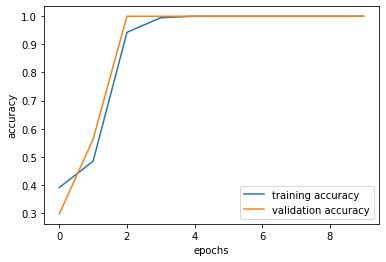

In [17]:
# Plot accuracy curve
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label= 'validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

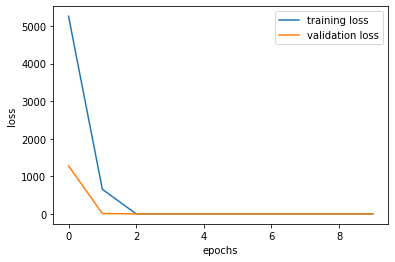

In [18]:
# Plot loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [19]:
ypred = model1.predict(X_test)
ypred[1]

3/3 [==============================] - 2s 637ms/step


array([4.7313218e-08, 9.9999994e-01, 3.7930605e-12], dtype=float32)

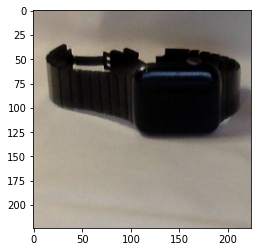

In [20]:
plt.imshow(X_test[7].astype('uint8'),cmap='gray');

In [21]:
ytest_true[7], y_test[7]

(0, array([1., 0., 0.], dtype=float32))

In [22]:
new_ypred=np.where(ypred > 0.5, 1, 0)

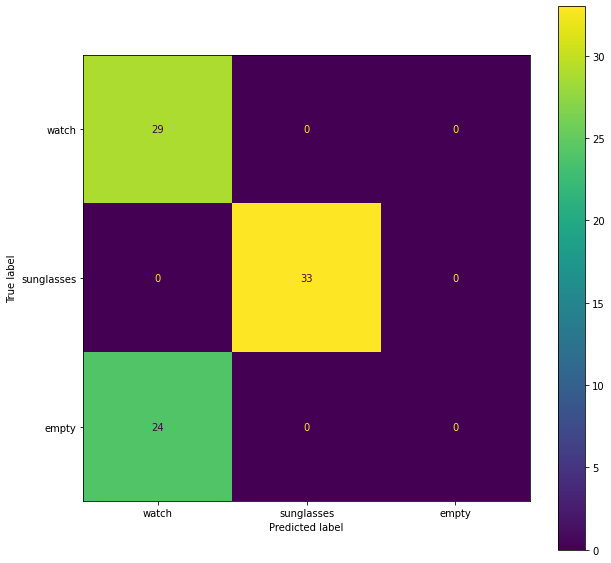

In [23]:
# Plot confusion matrix
cm = confusion_matrix(y_true=ytest_true, y_pred=np.argmax(new_ypred, axis=1))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['watch', 'sunglasses', 'empty'])
fig, ax = plt.subplots(figsize=(10,10))

disp.plot(ax=ax);

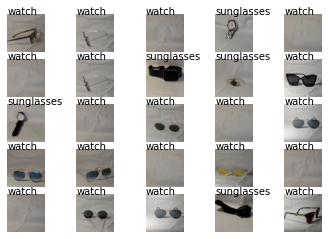

In [24]:
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_test[i].astype('uint8'))
    plt.axis('off')
    plt.text(0, 0, classes[new_ypred[i][0]]) 

# Pre-trained networks

In [25]:
# Instantiate the model
vgg_model = keras.applications.vgg16.VGG16(weights='imagenet',input_shape=(224,224,3),
                                            include_top=False)
vgg_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [26]:
vgg_model.get_layer(vgg_model.layers[0]._name).input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [27]:
print(f"The full model has {len(vgg_model.layers)} layers")

The full model has 19 layers


In [28]:
# important!!
for layers in vgg_model.layers[:]: 
    layers.trainable = False # --> all layers frozen means they are not trainable

In [29]:
out_features_vector = vgg_model.predict(X)
out_features_vector.shape

11/11 [==============================] - 181s 16s/step


(342, 7, 7, 512)

In [30]:
# reshape the vector
X_reshaped = out_features_vector.reshape((342,7*7*512))
X_reshaped.shape

(342, 25088)

In [31]:
y

array([0, 2, 2, 0, 0, 2, 1, 1, 1, 2, 1, 1, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2,
       2, 2, 2, 1, 0, 1, 1, 2, 1, 0, 2, 1, 2, 0, 0, 0, 2, 1, 1, 1, 0, 2,
       1, 0, 0, 2, 2, 1, 0, 0, 2, 1, 2, 1, 0, 2, 2, 1, 1, 0, 1, 0, 0, 0,
       0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 2, 0, 1, 2, 1, 0, 0, 1, 0, 2, 0, 2,
       0, 2, 0, 1, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 2, 1, 2, 1, 1, 1, 1, 1, 0, 2, 2, 1, 0, 0, 2, 2, 0, 1, 0, 0, 0,
       1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 1, 2, 1, 2, 2, 1, 0, 1, 2, 1, 2,
       2, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 0, 2, 0, 0, 1, 2, 1, 2, 0, 2,
       0, 0, 2, 0, 2, 1, 1, 1, 2, 1, 2, 1, 0, 0, 2, 2, 0, 2, 2, 0, 0, 1,
       0, 0, 2, 2, 0, 2, 2, 1, 2, 1, 1, 1, 0, 2, 0, 1, 2, 0, 0, 1, 0, 0,
       2, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 1, 2, 1, 0, 2, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0, 1, 1,
       0, 1, 2, 1, 2, 0, 0, 1, 0, 2, 2, 2, 1, 2, 0, 2, 1, 2, 2, 0, 2, 2,
       2, 2, 1, 0, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2,

In [32]:
y_reshaped = pd.Series(y)
y_reshaped

0      0
1      2
2      2
3      0
4      0
      ..
337    0
338    1
339    0
340    2
341    1
Length: 342, dtype: int64

In [33]:
# train-test split
X_train,X_test,y_train,y_test = train_test_split(X_reshaped, y_reshaped,test_size=0.25,random_state=42)

## Logistic Regression

In [34]:
lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [35]:
ypred_train= lg.predict(X_train)
ypred_train

array([2, 1, 1, 1, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 0, 0, 2, 2,
       1, 1, 1, 2, 1, 2, 1, 0, 1, 0, 1, 2, 2, 0, 0, 0, 1, 0, 1, 0, 2, 1,
       0, 0, 0, 2, 0, 2, 2, 2, 0, 1, 1, 0, 2, 0, 2, 1, 2, 1, 1, 2, 2, 1,
       0, 0, 2, 1, 1, 2, 1, 2, 2, 1, 0, 2, 0, 1, 0, 1, 2, 1, 1, 0, 2, 1,
       1, 1, 0, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 0, 0, 2, 2, 1, 2, 0, 0, 0,
       0, 2, 2, 1, 2, 0, 1, 2, 2, 2, 2, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1,
       2, 2, 0, 1, 2, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 2, 1, 0, 0, 0, 1, 2, 2, 2, 0, 1, 1, 2, 2, 1, 2, 1, 0, 1, 0,
       1, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 2, 0, 2, 0, 2, 1,
       2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 0, 0, 2, 0, 2, 0, 1, 0,
       2, 0, 2, 0, 0, 0, 2, 1, 0, 2, 2, 0, 2, 2, 0, 0, 1, 2, 2, 1, 1, 0,
       0, 2, 2, 2, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1])

In [36]:
ypred_test = lg.predict(X_test)
ypred_test

array([1, 1, 2, 0, 2, 2, 1, 0, 0, 1, 0, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 0, 2, 0,
       0, 2, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 2, 1, 2, 0, 0, 2, 0, 1, 2, 1,
       2, 0, 0, 1, 1, 0, 0, 1, 2, 0, 2, 0, 0, 1, 1, 1, 0, 2, 1, 0])

In [37]:
# validation
scores_train = cross_val_score(lg,X_train,y_train,cv=10)
scores_train

array([1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.96, 1.  ])

In [38]:
print(f"accuracy score on train: {accuracy_score(y_train,ypred_train)}")
print(f"accuracy score on test: {accuracy_score(y_test,ypred_test)}")

accuracy score on train: 1.0
accuracy score on test: 1.0


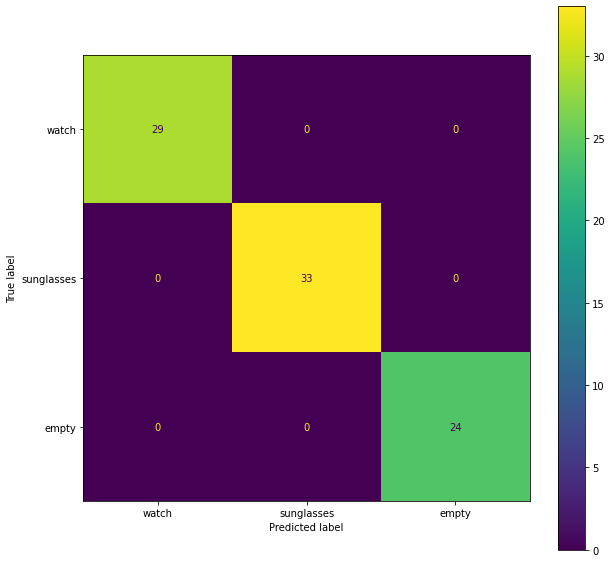

In [39]:
# confusion matric to check the results
cm = confusion_matrix(y_true=y_test, y_pred=ypred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['watch', 'sunglasses', 'empty'])
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax);

### RandomForest

In [40]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5)

In [41]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5)

In [42]:
ypred_test = rf.predict(X_test)
ypred_test

array([1, 1, 2, 0, 2, 2, 1, 0, 0, 1, 0, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 2, 1, 2, 1, 2, 0, 2, 0, 0, 2, 0,
       0, 2, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 2, 1, 2, 0, 0, 2, 0, 1, 2, 1,
       2, 0, 0, 1, 1, 0, 0, 1, 2, 0, 2, 0, 0, 1, 1, 0, 0, 2, 1, 0])

In [43]:
ypred_train= rf.predict(X_train)
ypred_test

array([1, 1, 2, 0, 2, 2, 1, 0, 0, 1, 0, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 2, 1, 2, 1, 2, 0, 2, 0, 0, 2, 0,
       0, 2, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 2, 1, 2, 0, 0, 2, 0, 1, 2, 1,
       2, 0, 0, 1, 1, 0, 0, 1, 2, 0, 2, 0, 0, 1, 1, 0, 0, 2, 1, 0])

In [44]:
print(f"accuracy score on train: {accuracy_score(y_train,ypred_train)}")
print(f"accuracy score on test: {accuracy_score(y_test,ypred_test)}")

accuracy score on train: 1.0
accuracy score on test: 0.9767441860465116


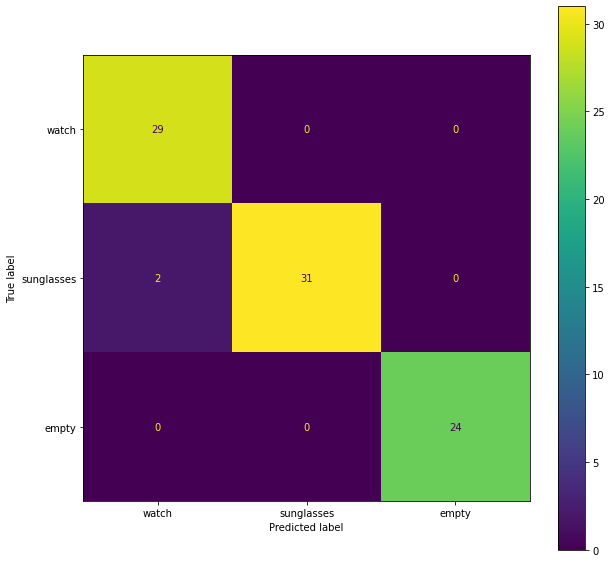

In [45]:
# confusion matric to check the results
cm = confusion_matrix(y_true=y_test, y_pred=ypred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['watch', 'sunglasses', 'empty'])
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax);